In [ ]:
#We import everything we are going to use in the program, right now, to prevent errors
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import itertools

In [ ]:

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
data_dir = '/content/drive/MyDrive/Data Science/Breast Cancer/data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data Science/Breast Cancer/data')

Found 2686 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

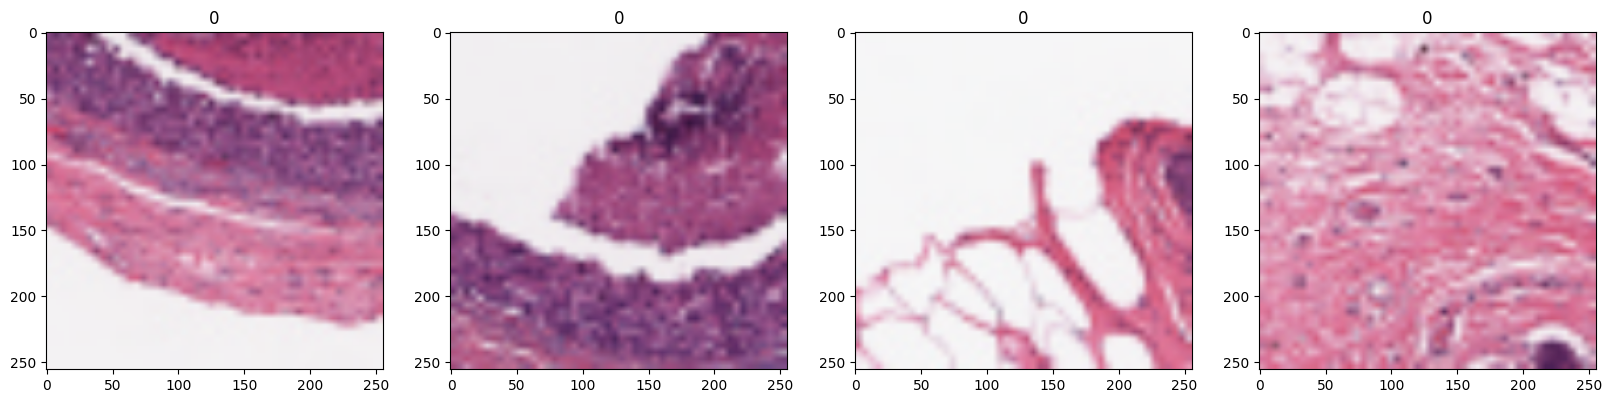

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.5176471 , 0.27058825, 0.45882353],
          [0.5176471 , 0.27058825, 0.45882353],
          [0.5176471 , 0.27058825, 0.45882353],
          ...,
          [0.7058824 , 0.4       , 0.5686275 ],
          [0.7058824 , 0.4       , 0.5686275 ],
          [0.7058824 , 0.4       , 0.5686275 ]],
 
         [[0.5176471 , 0.27058825, 0.45882353],
          [0.5176471 , 0.27058825, 0.45882353],
          [0.5176471 , 0.27058825, 0.45882353],
          ...,
          [0.7058824 , 0.4       , 0.5686275 ],
          [0.7058824 , 0.4       , 0.5686275 ],
          [0.7058824 , 0.4       , 0.5686275 ]],
 
         [[0.5176471 , 0.27058825, 0.45882353],
          [0.5176471 , 0.27058825, 0.45882353],
          [0.5176471 , 0.27058825, 0.45882353],
          ...,
          [0.7058824 , 0.4       , 0.5686275 ],
          [0.7058824 , 0.4       , 0.5686275 ],
          [0.7058824 , 0.4       , 0.5686275 ]],
 
         ...,
 
         [[0.6117647 , 0.38039216, 0.5254902 ],
          [0.61176

In [ ]:
len(data)

84

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

58

In [ ]:
val_size

16

In [ ]:
test_size

8

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#model = Sequential()

In [ ]:

#model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
#model.add(MaxPooling2D())
#model.add(Conv2D(32, (3,3), 1, activation='relu'))
#model.add(MaxPooling2D())
#model.add(Conv2D(16, (3,3), 1, activation='relu'))
#model.add(MaxPooling2D())
#model.add(Flatten())
#model.add(Dense(256, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))


In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_18 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_19 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                     

In [ ]:
logdir='/content/drive/MyDrive/Data Science/Breast Cancer/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
58/58 [==============================] - 33s 462ms/step - loss: 0.3990 - accuracy: 0.8249 - val_loss: 0.8006 - val_accuracy: 0.7383
Epoch 2/20
58/58 [==============================] - 27s 458ms/step - loss: 0.2760 - accuracy: 0.8890 - val_loss: 0.4844 - val_accuracy: 0.7695
Epoch 3/20
58/58 [==============================] - 27s 458ms/step - loss: 0.2193 - accuracy: 0.9267 - val_loss: 0.4590 - val_accuracy: 0.7637
Epoch 4/20
58/58 [==============================] - 22s 373ms/step - loss: 0.1585 - accuracy: 0.9537 - val_loss: 0.3410 - val_accuracy: 0.7871
Epoch 5/20
58/58 [==============================] - 22s 369ms/step - loss: 0.1158 - accuracy: 0.9736 - val_loss: 0.2709 - val_accuracy: 0.9082
Epoch 6/20
58/58 [==============================] - 27s 461ms/step - loss: 0.0944 - accuracy: 0.9752 - val_loss: 0.3421 - val_accuracy: 0.7812
Epoch 7/20
58/58 [==============================] - 27s 463ms/step - loss: 0.0809 - accuracy: 0.9795 - val_loss: 0.3049 - val_accuracy: 0.8496

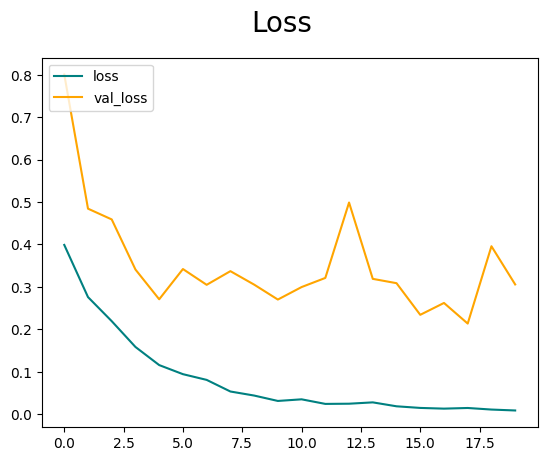

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

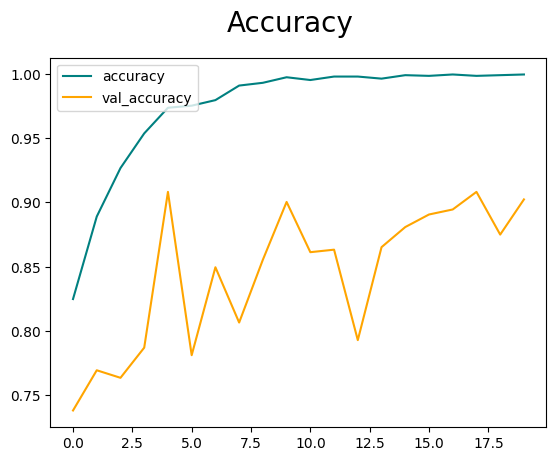

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 30ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.962963, shape=(), dtype=float32) tf.Tensor(0.40625, shape=(), dtype=float32) tf.Tensor(0.84765625, shape=(), dtype=float32)


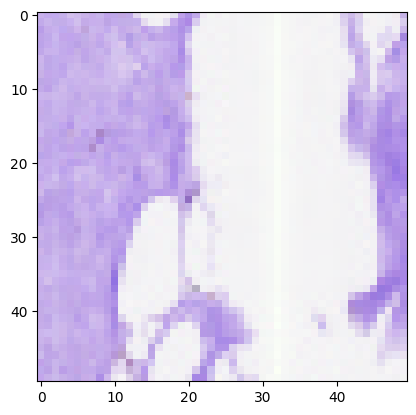

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Data Science/Breast Cancer/test/9261_idx5_x151_y2051_class0.png')
plt.imshow(img)
plt.show()

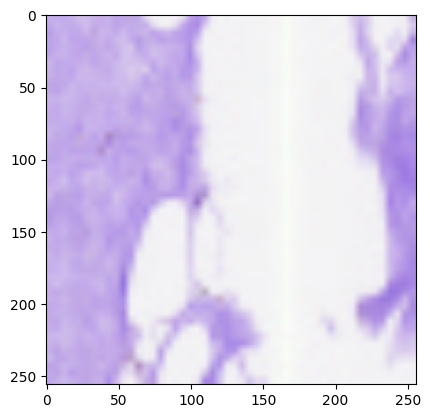

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 188ms/step


In [ ]:
yhat

array([[0.00819056]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Cancer has been detected')
else:
    print(f'There is no cancer')

There is no cancer
